In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Отчет

In [3]:
# Загрузить ДФ
fdf = pd.read_csv('report.csv')
pd.set_option('display.max_columns', None)

# Полученные данные после первичной обработки

In [4]:
fdf

,Unnamed: 0,ID объявления,Количество комнат,Метро,"Общая площадь, м2","Площадь кухни, м2",Этаж,Этажей в доме,Тип строения,Парковка,Квартплата,Залог,комм,Срок,Предоплата,Ремонт,Балкон,Лоджия,Окна,Санузел раздельный,Санузел совмещенный,Можно с детьми/животными,"Высота потолков, м",Лифты пасс.,Лифты груз.,Мусоропровод
0,0,271271157,4,Смоленская,200.0,20.0,5,16,Монолитный,подземная,500000.0,500000,0.000,Срок аренды - Длительный,1,Дизайнерский,0,0,0,0,0,"Можно с детьми, Можно с животными",3,4,1,Да
1,1,271634126,4,Смоленская,198.0,18.0,5,16,Монолитно-кирпичный,подземная,500000.0,500000,0.000,Срок аренды - Длительный,1,Дизайнерский,0,0,На улицу и двор,2,1,Можно с детьми,3,1,1,Нет
2,2,271173086,4,Смоленская,200.0,4.0,5,16,0,подземная,500000.0,500000,5160.697,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,3,0,Можно с детьми,3,1,0,0
3,3,272197456,4,Смоленская,170.0,17.0,5,6,0,подземная,400000.0,400000,5160.697,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,3,0,Можно с животными,3,1,0,0
4,4,273614615,2,Арбатская,58.0,5.0,12,26,Панельный,0,225000.0,225000,0.000,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,2,0,0,3,1,1,Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,0,Говорово,35.0,8.0,10,14,0,0,42000.0,42000,0.000,Срок аренды - Длительный,1,Евроремонт,1,0,0,1,0,0,2,1,1,0
23364,23364,274654844,1,Солнцево,38.7,11.0,5,18,Монолитный,0,45000.0,45000,0.000,Срок аренды - Длительный,1,Евроремонт,1,0,Во двор,1,0,0,2,1,1,0
23365,23365,268679909,2,Солнцево,43.1,43.1,5,5,Кирпичный,0,50000.0,50000,0.000,Срок аренды - Длительный,1,Дизайнерский,1,0,На улицу и двор,1,0,Можно с детьми,2,0,0,0
23366,23366,274807525,2,Солнцево,52.5,10.0,8,23,Монолитный,наземная,55000.0,50000,0.000,Срок аренды - Длительный,2,Евроремонт,1,0,Во двор,1,1,0,2,3,0,Да


Для построения графиков  отфильтруем наш датасет, убрав из него нулевые значения

# Преподготовка к графикам (фильтрация)

Строим графики на основе полученных данных

In [5]:
plt.style.use('ggplot')

fdf_filter = fdf[
    (fdf['Квартплата'] != 0) &
    (fdf['комм'] != 0) &
    (fdf['Тип строения'] != '0') &
    (fdf['Метро'] != '0') & 
    (fdf['Парковка'] != '0') & 
    (fdf['Ремонт'] != '0') &
    (fdf['Окна'] != '0') &
    (fdf['Можно с детьми/животными'] != '0') &
    (fdf['Мусоропровод'] != '0') &
    (fdf['Залог'] != 0) & 
    (fdf['Высота потолков, м'] != '0') 
]

# EDA Анализ

### Цели анализа:
1. ***Проанализировать город Москва***. \
Определить, какие наиболее выраженные признаки и их взаимосвязи имеет смысл отобразить. \
    1.1. `(Квартиры / Метро)`. Определить количество квартир в Москве и отобразить распределение по станциям метро \
    1.2. `(Метро / По частоте)`. Выделить список наиболее задействованных станций метро \
    1.3. `(Цена / От станции метро)`. Показать зависимость ежемесячной цены от станции метро \
    1.4. `(Цена / От количества комнат)`. Показать зависимость ежемесячной цены от количества комнат \
    1.5. `(Цена / От общей площади)`. Показать зависимость ежемесячной цены от общей площади \
    1.6. ...остальные зависимости -- это полет фантации

## 1. Посмотрим как зависит Квартплата от коммуналки и типа строения

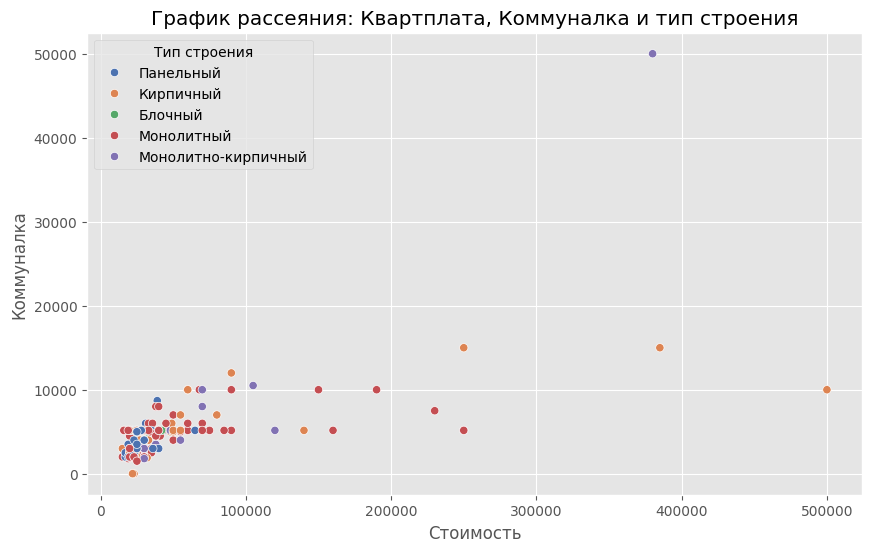

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fdf_filter, x='Квартплата', y='комм', hue='Тип строения', palette='deep')
# Настройка графика
plt.title('График рассеяния: Квартплата, Коммуналка и тип строения')
plt.xlabel('Стоимость')
plt.ylabel('Коммуналка')
plt.legend(title='Тип строения');

#### На данный момент заметен сильный разрыв в значениях, т.к. еще не исследовались данные на выбросы. 
### 2. Давайте тогда построим ящик с усами и посмотрим выбросы у Квартплаты и Залога. 

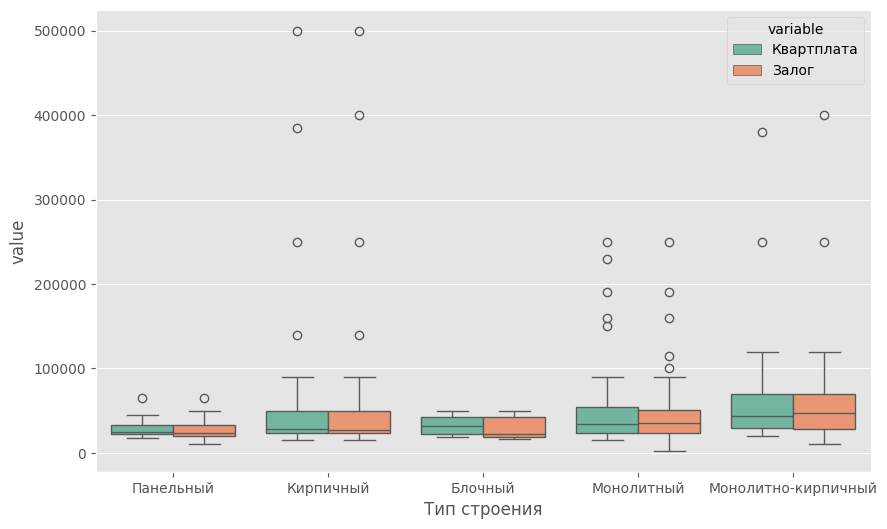

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fdf_filter.melt(id_vars='Тип строения', value_vars=['Квартплата', 'Залог']), 
             x='Тип строения', y='value', hue='variable', palette='Set2');

###  3. `(Квартиры / Метро)`. Определить количество квартир в Москве и отобразить распределение по станциям метро
1. Нужна только Москва. Если занчение ноль -- нет метро, квартира находится не в Москве.
2. Показать как квартиры распределены относительно `метро`

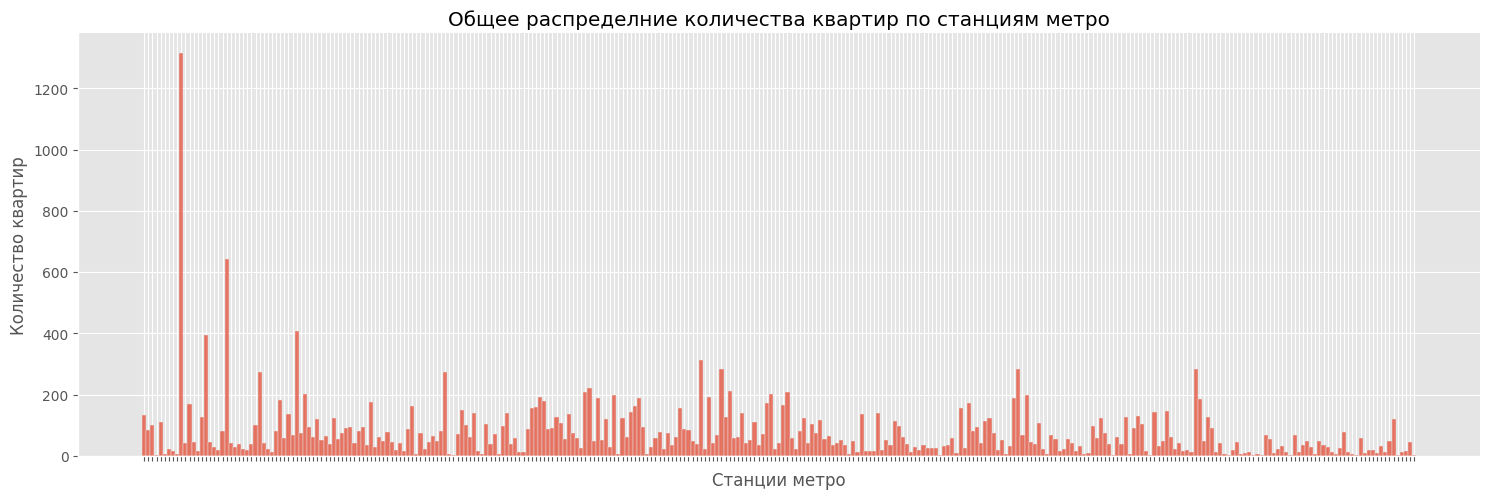

In [8]:
# Вытащить ненулевые значения
# subwaydf = pd.DataFrame()
subwaydf = fdf[fdf['Метро'] != 0]

ax = sns.displot(subwaydf, x='Метро', kind='hist', height=5, aspect=3)
plt.xticks(rotation=90);
ax.set(xticklabels=[])
ax.set_axis_labels("Станции метро", "Количество квартир")
ax.set(title='Общее распределние количества квартир по станциям метро')

- Вывод: видим, что есть станция метро, по которой количество объявлений кратно превышает количество объявлений в других районах. Эта станция метро - Проспект мира.
- - В дальнейшем исследовании определим станции метро, объявления по которым встречаются выше среднего по частоте объявлений

 ### 4. `(Метро / По частоте)`. Выделить список наиболее задействованных станций метро

In [9]:
# Сгруппируем по столбцу Метро и агрегируем по количеству объявлений
mean_subways = subwaydf.copy()
mean_subways = mean_subways.groupby('Метро').agg({'ID объявления':'count'}).sort_values('ID объявления', ascending=False)
# Найдем среднее значение
num = mean_subways['ID объявления'].mean()
num

np.float64(75.62459546925567)

In [10]:
# Выведем только значения выше средней
mean_subways = mean_subways[mean_subways['ID объявления'] > num]
mean_subways = mean_subways.reset_index()
mean_subways

,Метро,ID объявления
0,0,1315
1,Проспект Мира,644
2,Улица Академика Янгеля,409
3,Селигерская,393
4,Щелковская,313
...,...,...
98,Крымская,80
99,Гражданский,80
100,Василеостровская,76
101,Новокузнецкая,76


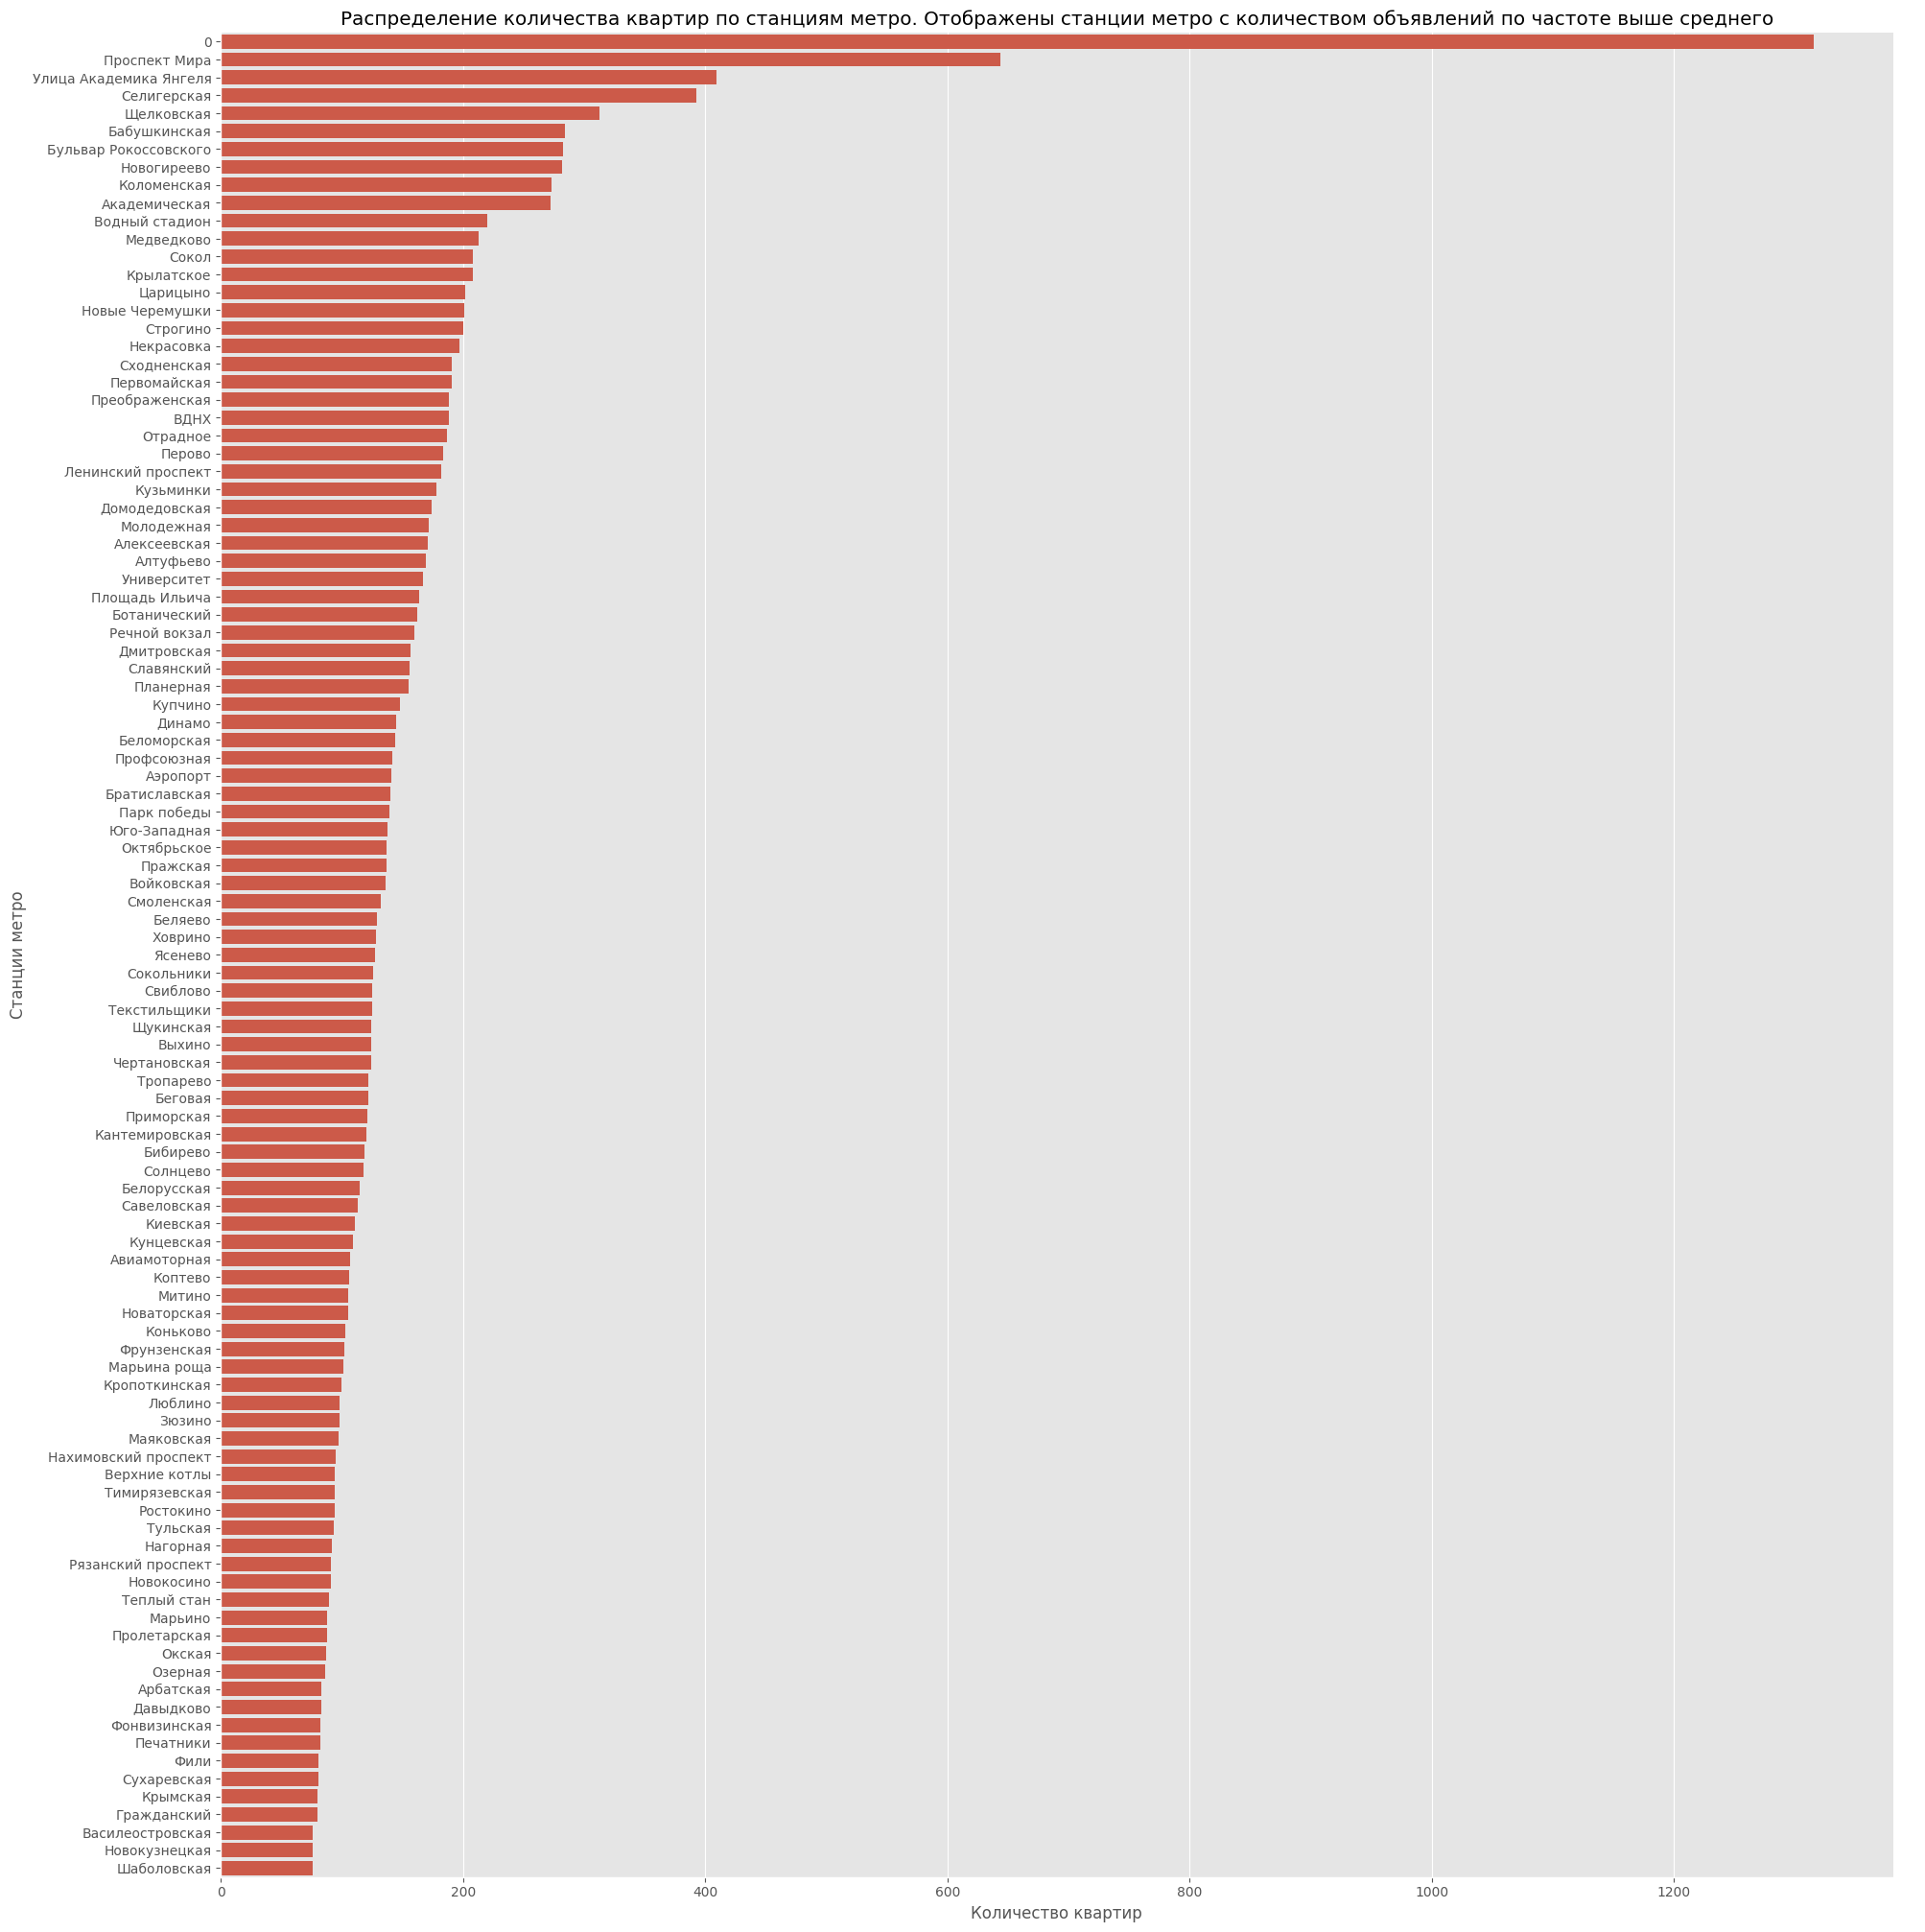

In [11]:
# Построим распределние квартир по станциям метро при количестве объявлений выше среднего
ax = sns.catplot(mean_subways, x='ID объявления', y='Метро', kind='bar', height=20, aspect=1)
plt.xticks(rotation=0);
ax.set_axis_labels("Количество квартир", "Станции метро")
ax.set(title='Распределение количества квартир по станциям метро. Отображены станции метро с количеством объявлений по частоте выше среднего')

- Вывод: видим, что наиболее часто встречаются объявления по таким станциям метро как Проспект Мира, Улица Академика Янгеля, Селигерская, Щелковская, Бабушкинская, Бульвар Рокоссовского, Новогиреево, Коломенская, Академическая.

In [12]:
# Выделим список названий метро, который будем использовать дальше
list = mean_subways['Метро'].to_list()
# Создадим новый ДФ, с учетом только интересующих нас станций метро
dfsubways = fdf[fdf['Метро'].apply(lambda x: x in list)]
# dfsubways.groupby('Метро').agg({'ID объявления':'count'}) -- проверка прошла успешно

### 5. `(Цена / От станции метро)`. Показать зависимость ежемесячной цены от станции метро 


#### Посмотрим зависит ли квартплата от стоимости коммунальных услуг

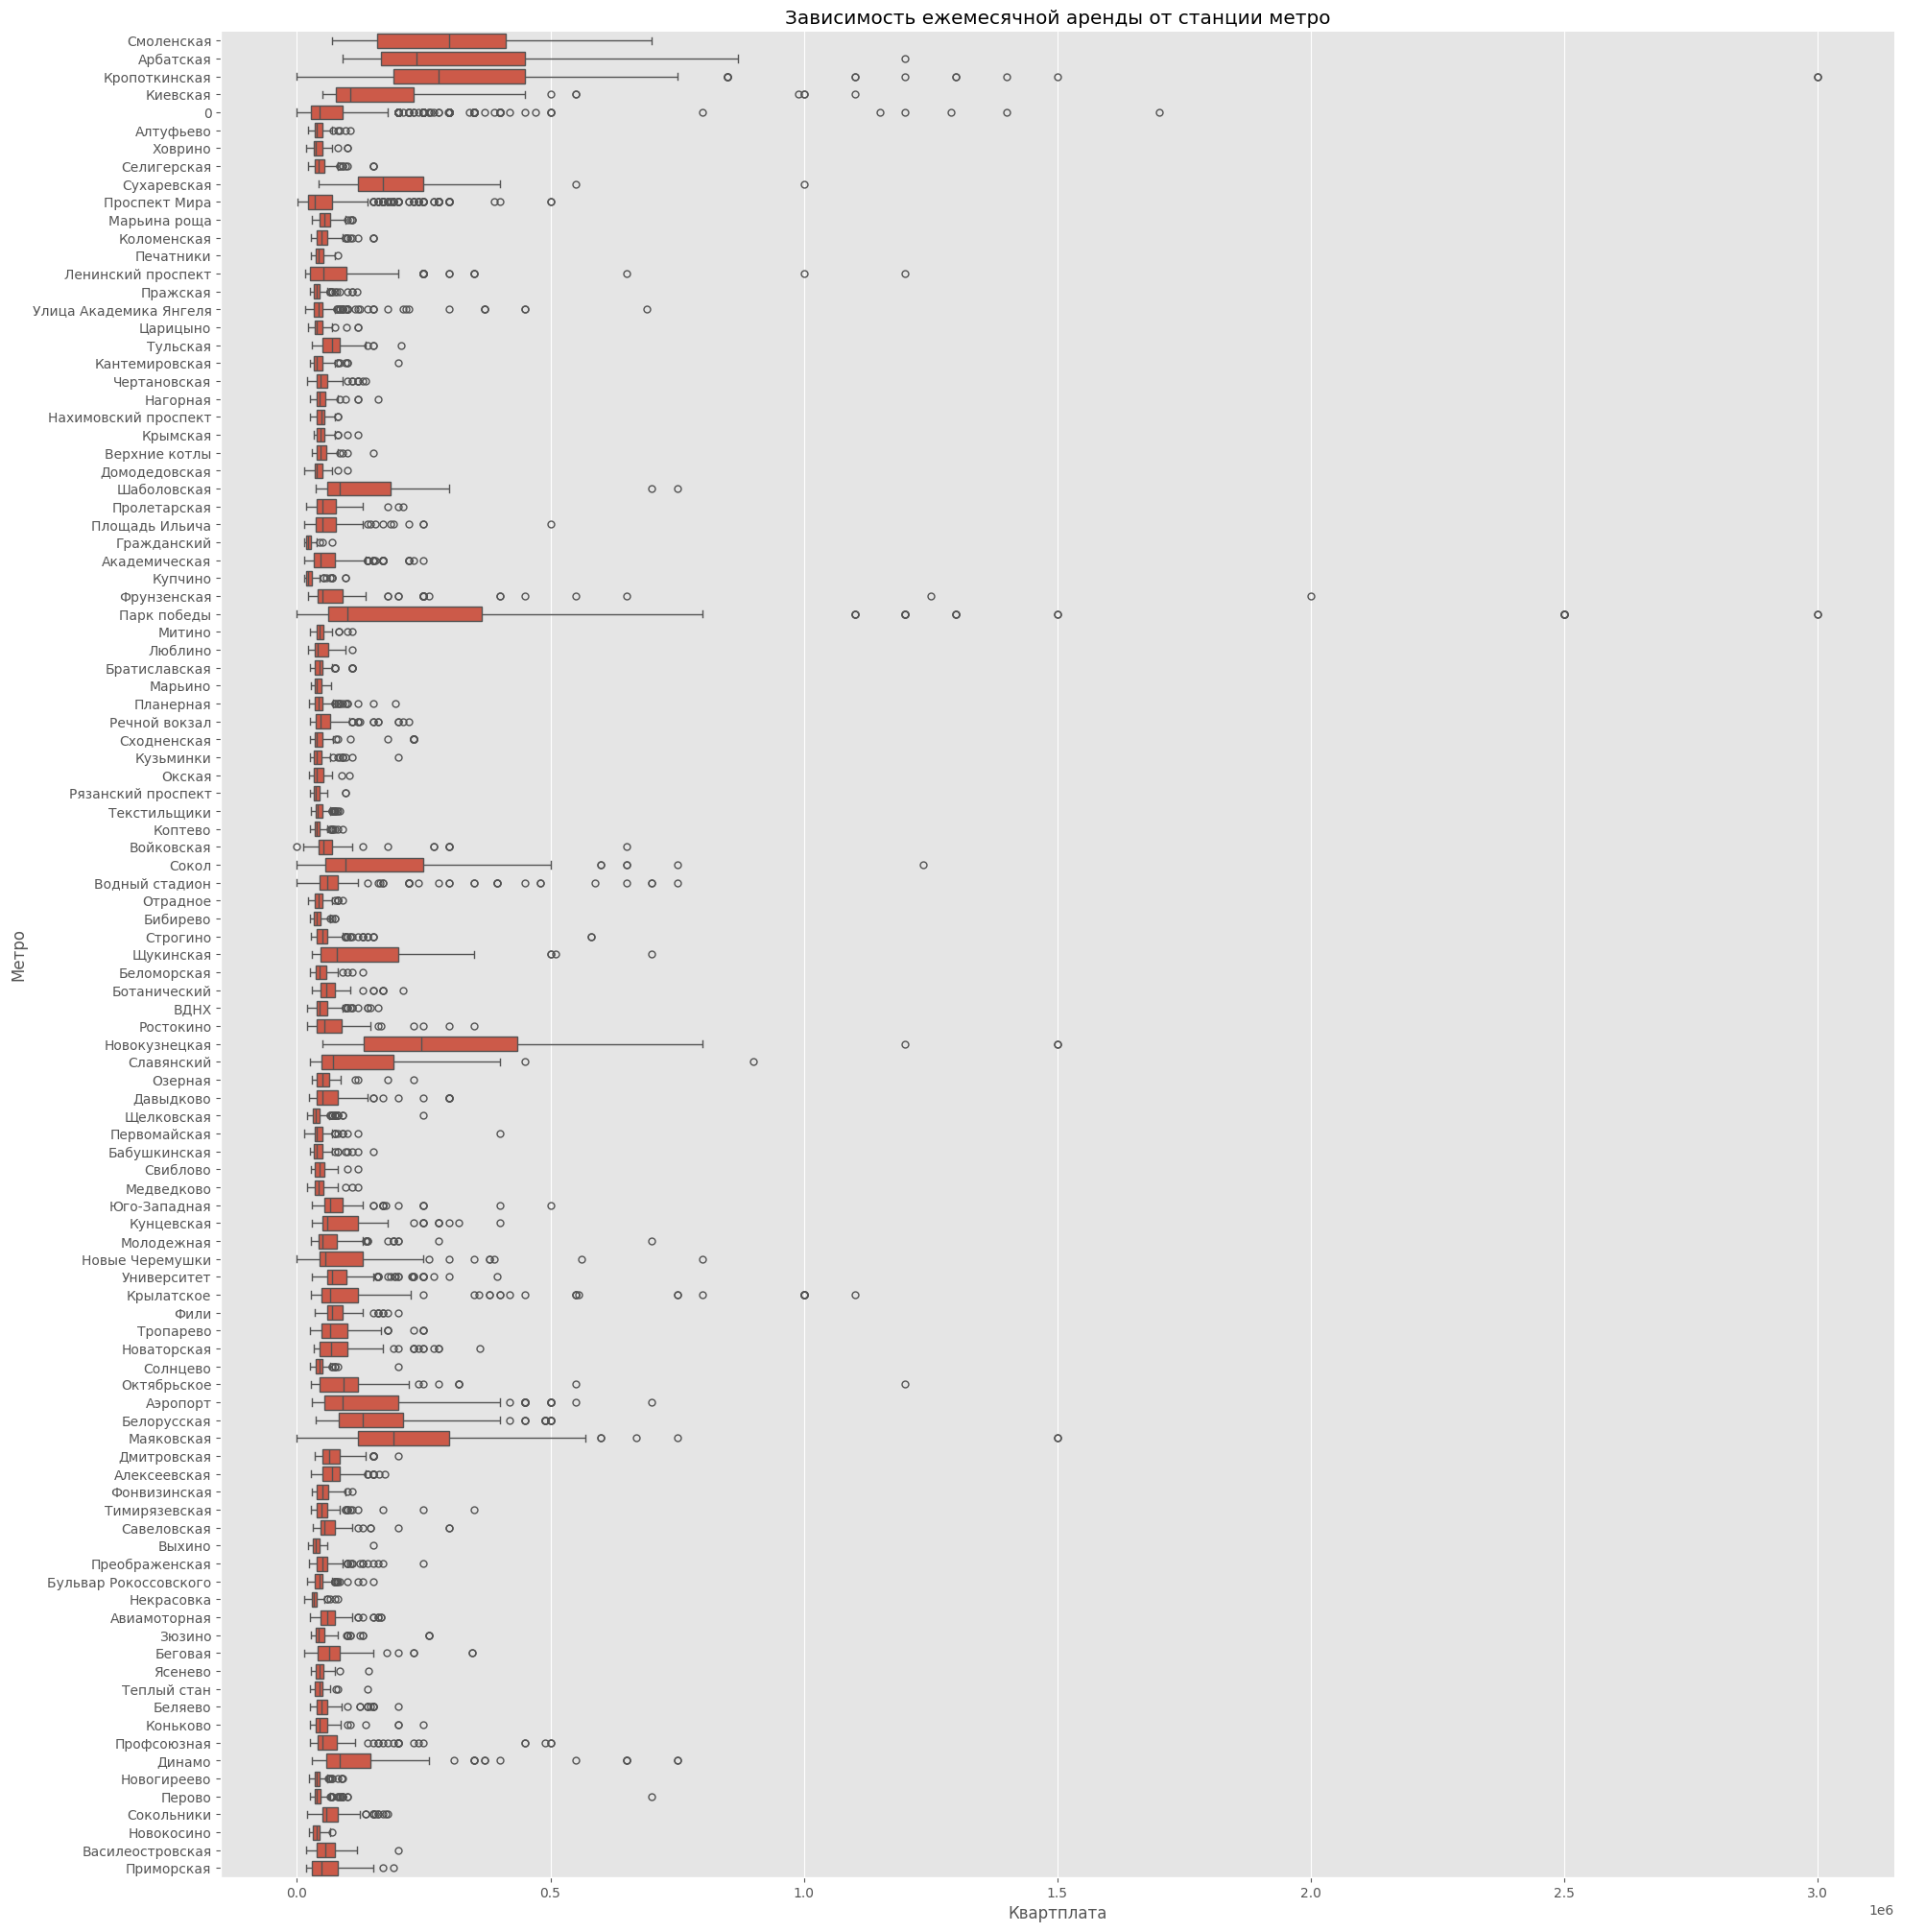

In [13]:
# ДФ с самыми частыми станциями метро
ax = sns.catplot(dfsubways, x='Квартплата', y='Метро', kind='box', height=20, aspect=1)
ax.set(title='Зависимость ежемесячной аренды от станции метро')

- Вывод: не смотря на то, что наиболее часто объявления встречаются по таким станциям метро, как Проспект Мира, Улица Академика Янгеля, Селигерская, Щелковская, Бабушкинская, Бульвар Рокоссовского, Новогиреево, Коломенская, Академическая, интересным оказалось то, что самые дорогие квартиры находятся совсем в других локациях метро.
- - Самые сильные выбросы по цене встречаются на таких станциях как: Кропоткинская, Парк победы, Новокузнецкая, Маяковская
- - Если по трём станциям еще возможно понять такие выбросы по цене (в силу расположения внутри ТТК и вблизи достопремечательностей), то Новокузнецкая вызывает вопросы.

### 6. `(Цена / От количества комнат)`. Показать зависимость ежемесячной цены от количества комнат \

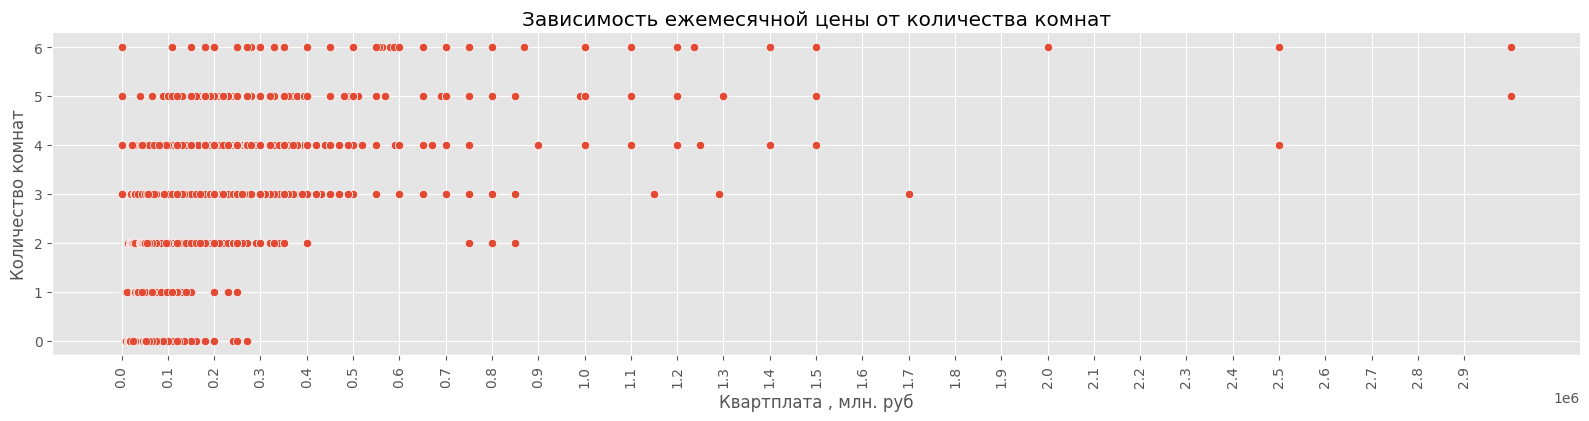

In [14]:
ax = sns.relplot(dfsubways, x='Квартплата', y='Количество комнат', kind='scatter', height=4, aspect=4)
plt.xticks(np.arange(0, 3*10**6, 100000))
plt.xlabel('Квартплата , млн. руб')
plt.xticks(rotation=90);
ax.set(title='Зависимость ежемесячной цены от количества комнат')

- Вывод: видим, что присутствуют сильные выбросы у квартир с количеством комнат 4-5-6. Говорить с редней цене за месяц по квартирам, где количество комнат 1-2-3 первично сказать трудн, поскольку наличие выбросов сильно искажает график.
- - Также явно видно, что до 5ти комнат в квартире значения в основном не превышают 600 тыс. руб.

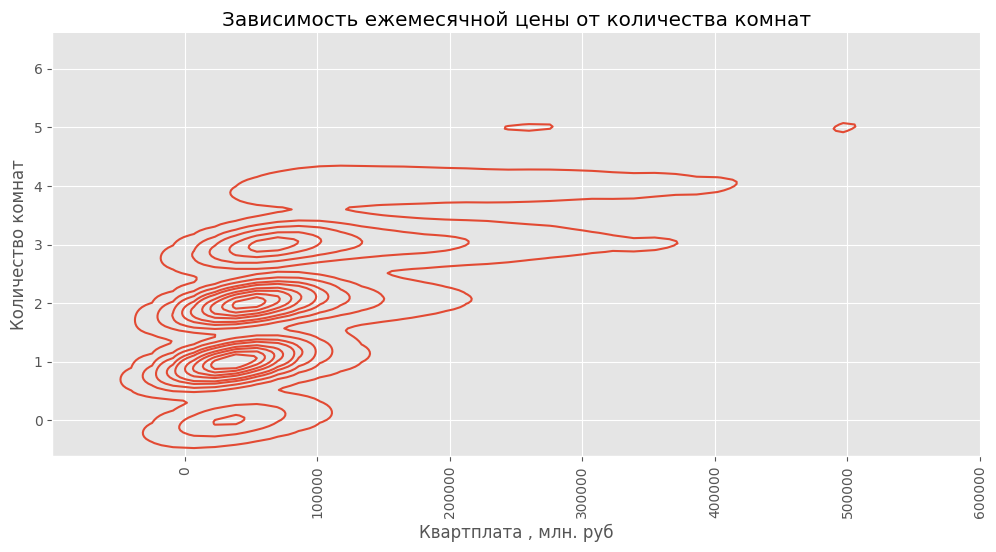

In [16]:
ax = sns.displot(dfsubways, x='Квартплата', y='Количество комнат', kind='kde', height=5, aspect=2)
plt.xticks(np.arange(0, 3*10**6, 100000))
plt.xlabel('Квартплата , млн. руб')
plt.xlim(-100000, 600000)
plt.xticks(rotation=90);
ax.set(title='Зависимость ежемесячной цены от количества комнат')

Вывод: глядя на этот график возникает ощущение, что где-то количество комнат равно 0. Рука-лицо, но мы все почистим. Это предобработка, ребзя, расслабляемся.

### 7. `(Цена / От общей площади)`. Показать зависимость ежемесячной цены от общей площади \

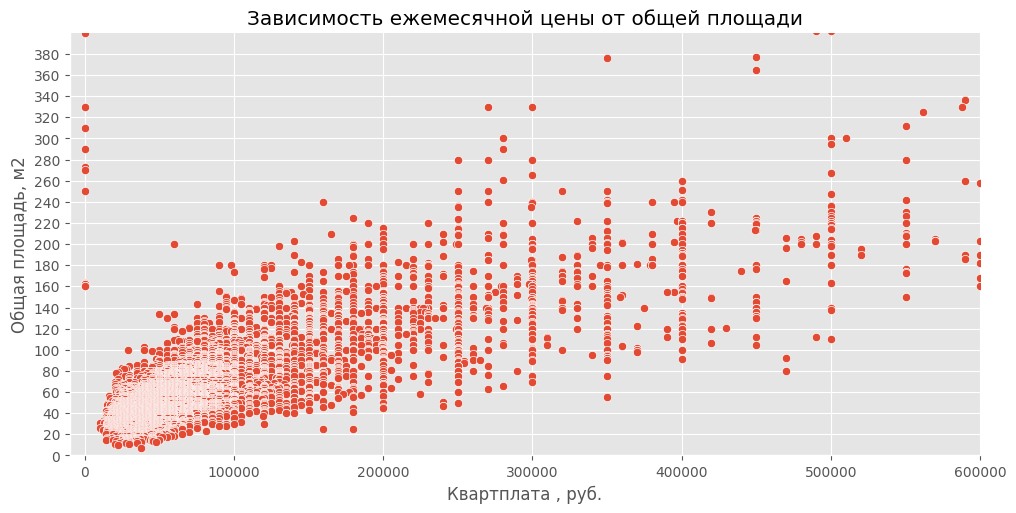

In [18]:
step_15 = dfsubways.copy()
step_15 = step_15.sort_values('Общая площадь, м2', ascending=False)
ax = sns.relplot(step_15, x='Квартплата', y='Общая площадь, м2', kind='scatter', height=5, aspect=2)
plt.xlabel('Квартплата , руб.')
plt.xlim(-10000,600000)
plt.yticks(np.arange(0, 400, 20))
plt.ylim(0, 400)
ax.set(title='Зависимость ежемесячной цены от общей площади');

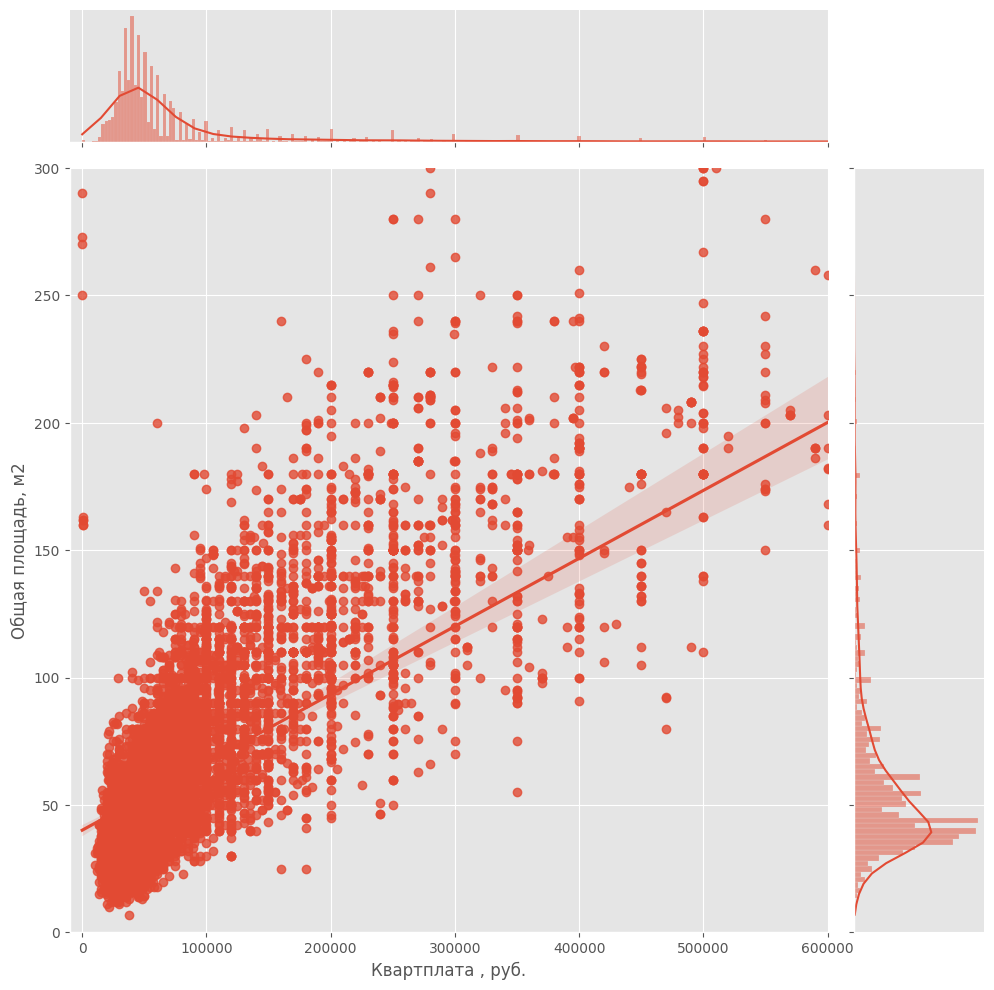

In [19]:
# Попробуем перестроить этот же график в более наглядном виде
ax = sns.jointplot(x='Квартплата', y='Общая площадь, м2', data=dfsubways, kind='reg', height=10)
plt.xlabel('Квартплата , руб.')
plt.xlim(-10000,600000)
plt.ylim(0,300);

- Вывод: основная часть квартир сконцентрирована по площади в диапазоне от 30 дл 150 м2. Ценовой разброс от 50 000 руб. до 200 000 руб.

### 8. Расммотрим несколько гистограмм

Text(0.5, 1.0, 'Гистограмма. Наличие парковки')

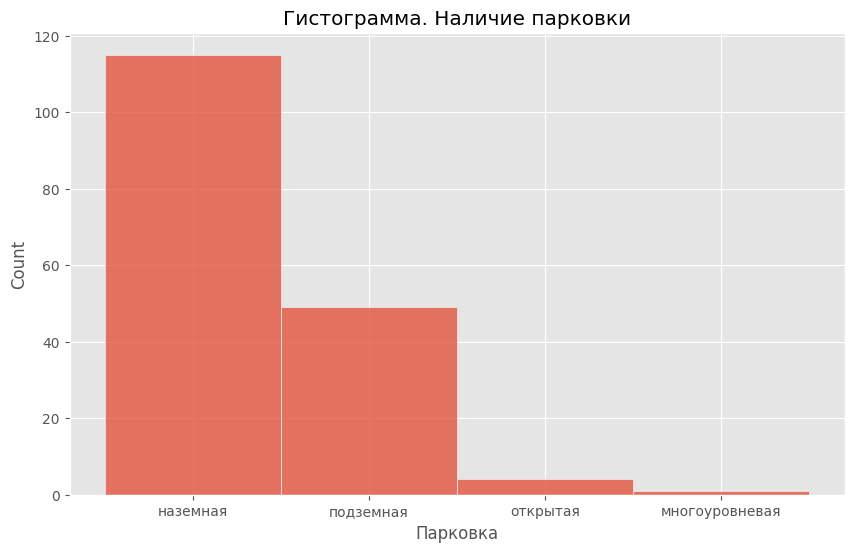

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data = fdf_filter, x = 'Парковка');
plt.title('Гистограмма. Наличие парковки')

Text(0.5, 1.0, 'Гистограмма. Наличие ремонта')

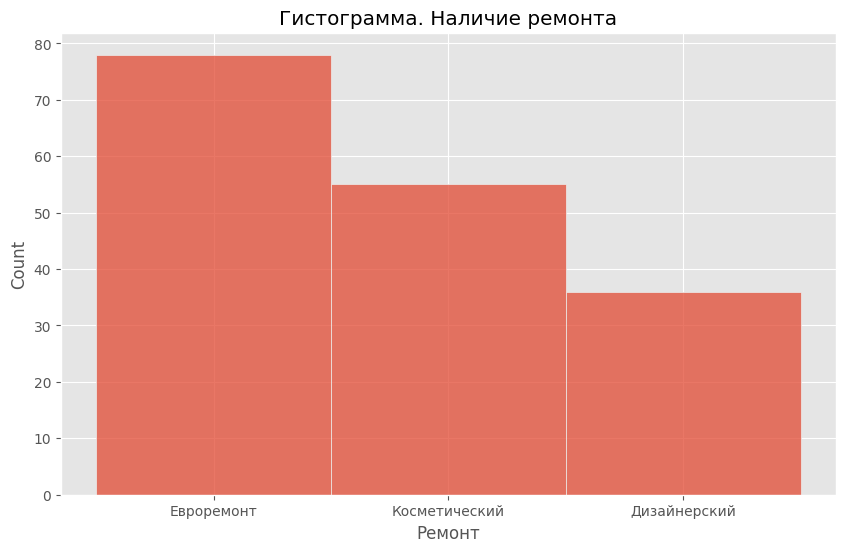

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data = fdf_filter, x = 'Ремонт');
plt.title('Гистограмма. Наличие ремонта')

## Рассмотрим график распределения
### попробуем построить гипотезу: зависит ли срок аренды от площади квартиры? чем меньше срок аренды тем меньше площадь?

Text(0, 0.5, 'Общая площадь, м2')

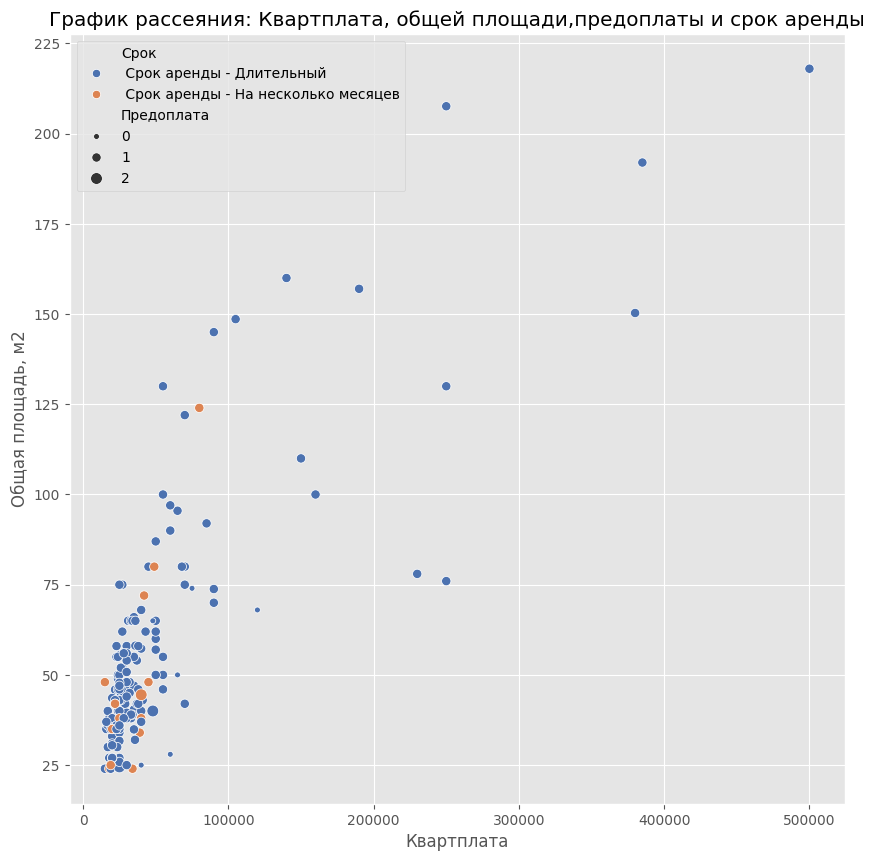

In [25]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=fdf_filter, x='Квартплата', y='Общая площадь, м2', hue='Срок', size = 'Предоплата', palette='deep')
# Настройка графика
plt.title('График рассеяния: Квартплата, общей площади,предоплаты и срок аренды')
plt.xlabel('Квартплата')
plt.ylabel('Общая площадь, м2')

### Посмотрим зависит ли стоимость от количества этажей в доме. 
(кажется даже без учета выбросов заметно, что чем меньше этажей в доме, тем он дороже, но эта гипотеза которой требуется проверка)

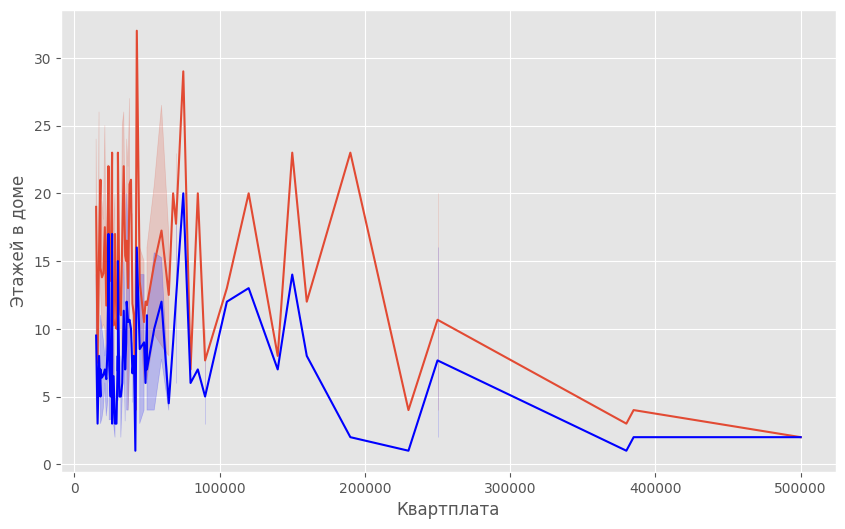

In [26]:

plt.figure(figsize=(10, 6))
sns.lineplot(data = fdf_filter, x = 'Квартплата', y = 'Этажей в доме');
sns.lineplot(data = fdf_filter, x = 'Квартплата', y = 'Этаж', color = 'blue');

### Гипотеза: увеличивается ли коммуналка от площади квартиры - ответ нет, но стоит проверить после "очистки" данных

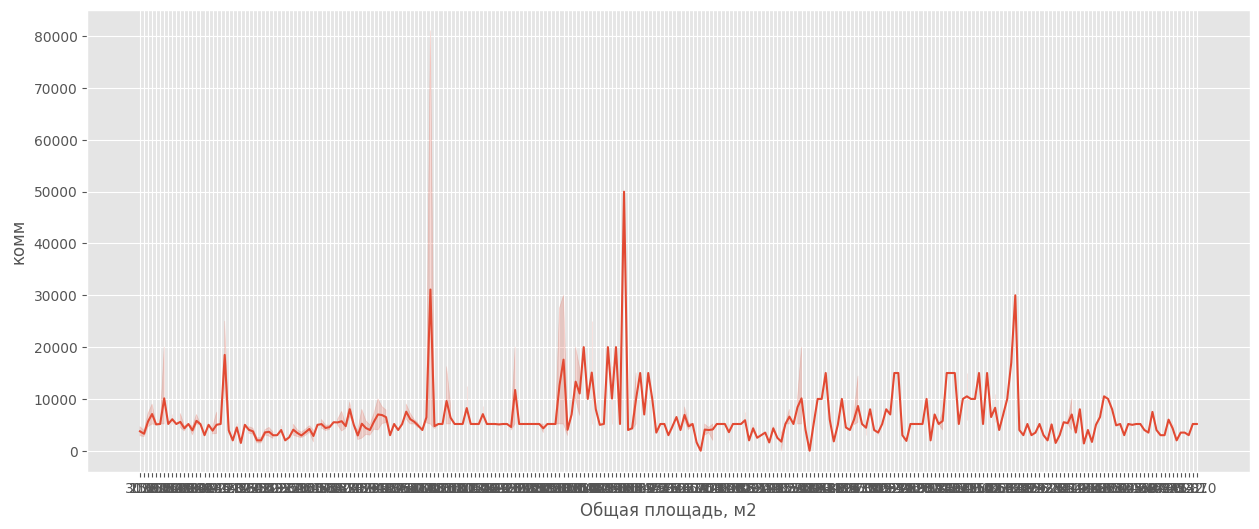

In [158]:
plt.figure(figsize=(15, 6))
sns.lineplot(data = fdf_filter, x = 'Общая площадь, м2', y = 'комм');

## Для более достоверных сведений необходимо:
1. Удалить выбросы у Квартплаты, Залога, Коммуналки, Высота потолка
2. Для построения дальнейших зависимостей перевести данные в численные характеристики
3. Заполнить 0 значениями (при возможности)

### 9.Рассмотрим зависимость коммуналки от квартплаты 

Text(0, 0.5, 'Коммуналка')

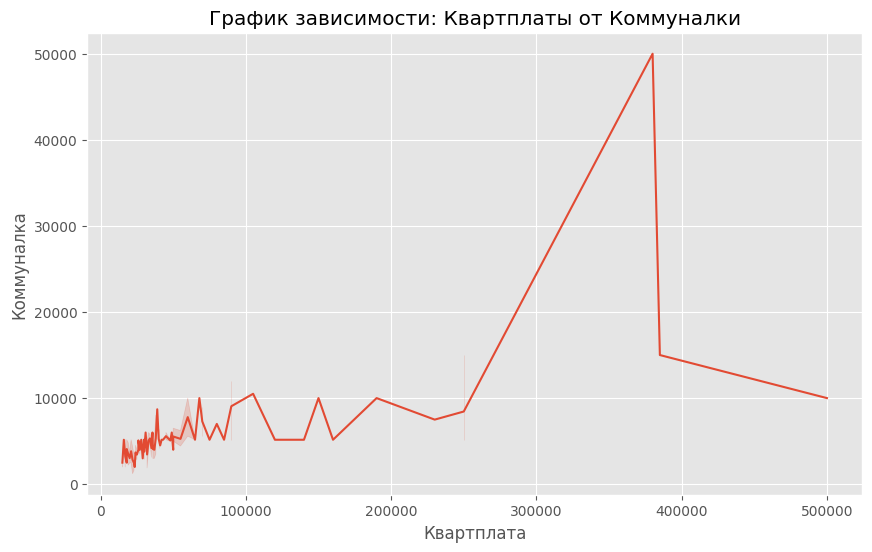

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = fdf_filter, x = 'Квартплата', y = 'комм');
# Настройка графика
plt.title('График зависимости: Квартплаты от Коммуналки')
plt.xlabel('Квартплата')
plt.ylabel('Коммуналка')

# Гипотезы:
1. Чем меньше этажей в доме, тем дороже квартплата
2. Самый "популярный" вариант среди обявлений это квартиры размером 40-60 м2
3. Увеличивается ли коммуналка с увеличением площади квартиры
4. Зависит ли срок аренды от площади квартиры? чем меньше срок аренды тем меньше площадь?¶
5. Вывод: видим, что присутствуют сильные выбросы у квартир с количеством комнат 4-5-6. Говорить с редней цене за месяц по квартирам, где количество комнат 1-2-3 первично сказать трудн, поскольку наличие выбросов сильно искажает график.
- - Также явно видно, что до 5ти комнат в квартире значения в основном не превышают 600 тыс. руб.

# Планы:
1. Построение тепловой карты и пр. зависимостей
2. Проверка гипотез после "очистки данных"